# Importing libraries, loading data set

In [1]:
# importing relevant libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# loading the dataset
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [3]:
# checking the data type for all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [4]:
# checking for any missing values
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [5]:
# checking for unique values
df.nunique()

Disease                 116
Fever                     2
Cough                     2
Fatigue                   2
Difficulty Breathing      2
Age                      26
Gender                    2
Blood Pressure            3
Cholesterol Level         3
Outcome Variable          2
dtype: int64

In [6]:
# Print counts of each entry in the 'Disease' column
disease_counts = df['Disease'].value_counts()
print(disease_counts)

Disease
Asthma                            23
Stroke                            16
Osteoporosis                      14
Hypertension                      10
Diabetes                          10
                                  ..
Autism Spectrum Disorder (ASD)     1
Hypoglycemia                       1
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Williams Syndrome                  1
Name: count, Length: 116, dtype: int64


In [7]:
# filter diseases with counts more than 10
common_diseases = disease_counts[disease_counts>=10].index
filter_df = df[df['Disease'].isin(common_diseases)]
print(filter_df['Disease'].value_counts())

Disease
Asthma          23
Stroke          16
Osteoporosis    14
Diabetes        10
Migraine        10
Hypertension    10
Name: count, dtype: int64


In [8]:
filter_df.describe()

,Age
count,83.00000
mean,49.00000
std,15.90444
min,25.00000
25%,35.00000
50%,45.00000
75%,60.00000
max,90.00000


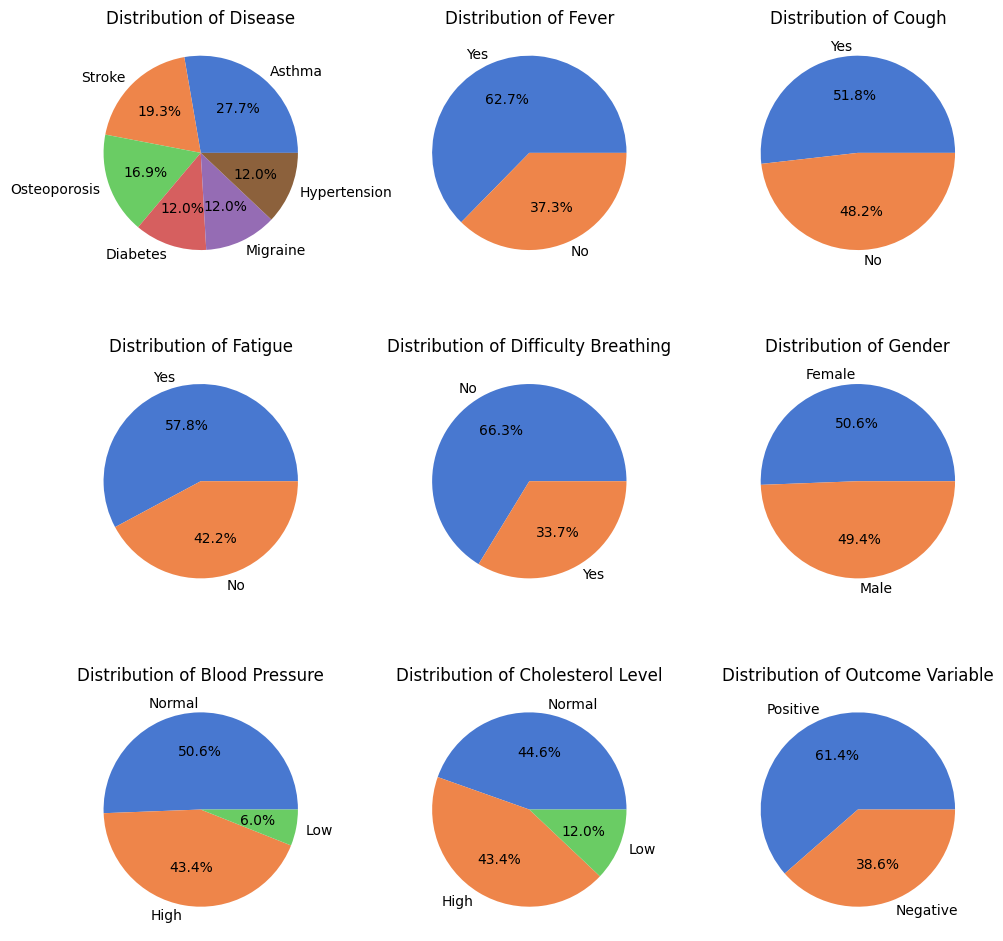

In [9]:
# analysing categorical columns
categorical_columns = ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 
                       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']

# Creating pie charts for the remaining categorical variables
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  

# Plotting each categorical variable as a pie chart
for col, ax in zip(categorical_columns, axes.flatten()):
    data = filter_df[col].value_counts()
    ax.pie(data, labels=data.index, autopct='%1.1f%%', colors=sns.color_palette('muted', len(data)))
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

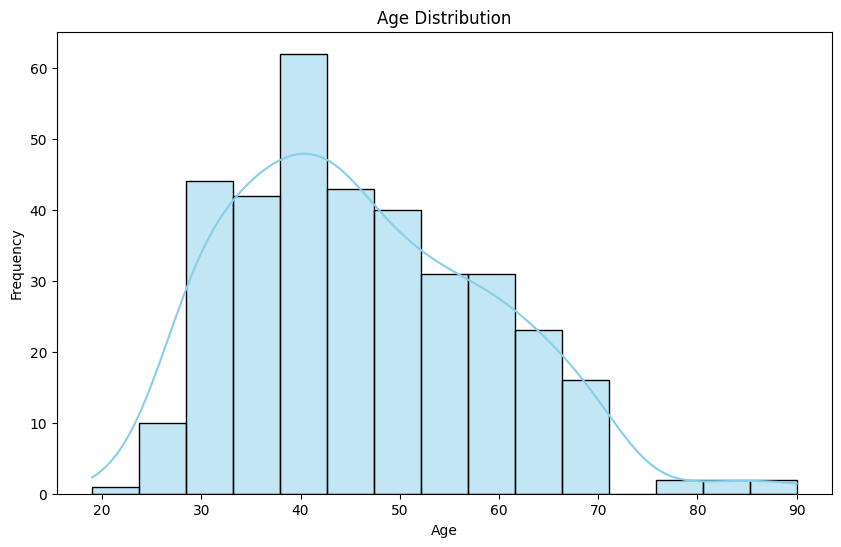

In [10]:
# Create the age distribution chart
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=15, color='skyblue')

# Customize the chart
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [11]:
# label encoding for further analysis
le = LabelEncoder()
label_mappings = {}
encoded_data = filter_df.copy()

# mapping for each categorical column
for col in categorical_columns:
    encoded_data[col] = le.fit_transform(filter_df[col])
    label_mappings[col] = {index: label for index, label in enumerate(le.classes_)}

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    print(mapping)

Column: Disease
{0: 'Asthma', 1: 'Diabetes', 2: 'Hypertension', 3: 'Migraine', 4: 'Osteoporosis', 5: 'Stroke'}
Column: Fever
{0: 'No', 1: 'Yes'}
Column: Cough
{0: 'No', 1: 'Yes'}
Column: Fatigue
{0: 'No', 1: 'Yes'}
Column: Difficulty Breathing
{0: 'No', 1: 'Yes'}
Column: Gender
{0: 'Female', 1: 'Male'}
Column: Blood Pressure
{0: 'High', 1: 'Low', 2: 'Normal'}
Column: Cholesterol Level
{0: 'High', 1: 'Low', 2: 'Normal'}
Column: Outcome Variable
{0: 'Negative', 1: 'Positive'}


In [12]:
# Function to analyze symptoms for a disease
def analyze_symptoms(disease_data):
    symptoms = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
    symptom_counts = disease_data[symptoms].mean()
    return symptom_counts

In [13]:
# Analyze symptoms for each common disease
disease_symptoms = {}
for disease in common_diseases:
    disease_encoded = list(label_mappings['Disease'].keys())[list(label_mappings['Disease'].values()).index(disease)]
    disease_data = encoded_data[encoded_data['Disease'] == disease_encoded]
    disease_symptoms[disease] = analyze_symptoms(disease_data)

In [24]:
# Create a dataframe from the disease symptoms dictionary
symptom_df = pd.DataFrame.from_dict(disease_symptoms, orient='index')
symptom_df.columns = [f"{col}" for col in ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']]


<Figure size 1200x800 with 0 Axes>

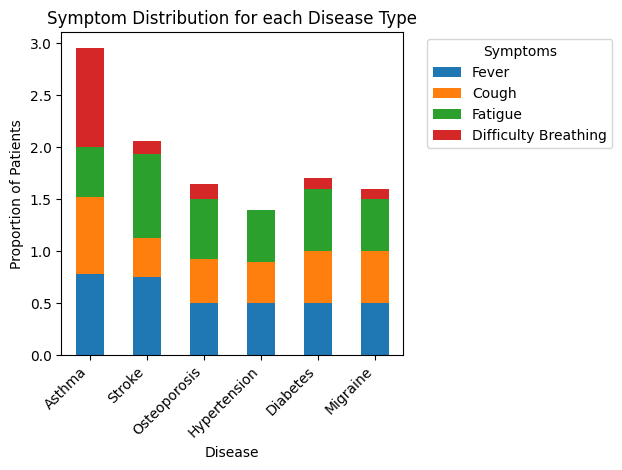

Detailed Symptom Information for Diseases:
                 Fever     Cough   Fatigue  Difficulty Breathing
Asthma        0.782609  0.739130  0.478261              0.956522
Stroke        0.750000  0.375000  0.812500              0.125000
Osteoporosis  0.500000  0.428571  0.571429              0.142857
Hypertension  0.500000  0.400000  0.500000              0.000000
Diabetes      0.500000  0.500000  0.600000              0.100000
Migraine      0.500000  0.500000  0.500000              0.100000


In [26]:
# Plot the results
plt.figure(figsize=(12, 8))
symptom_df.plot(kind='bar', stacked=True)
plt.title('Symptom Distribution for each Disease Type')
plt.xlabel('Disease')
plt.ylabel('Proportion of Patients')
plt.legend(title='Symptoms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print detailed information
print("Detailed Symptom Information for Diseases:")
print(symptom_df)

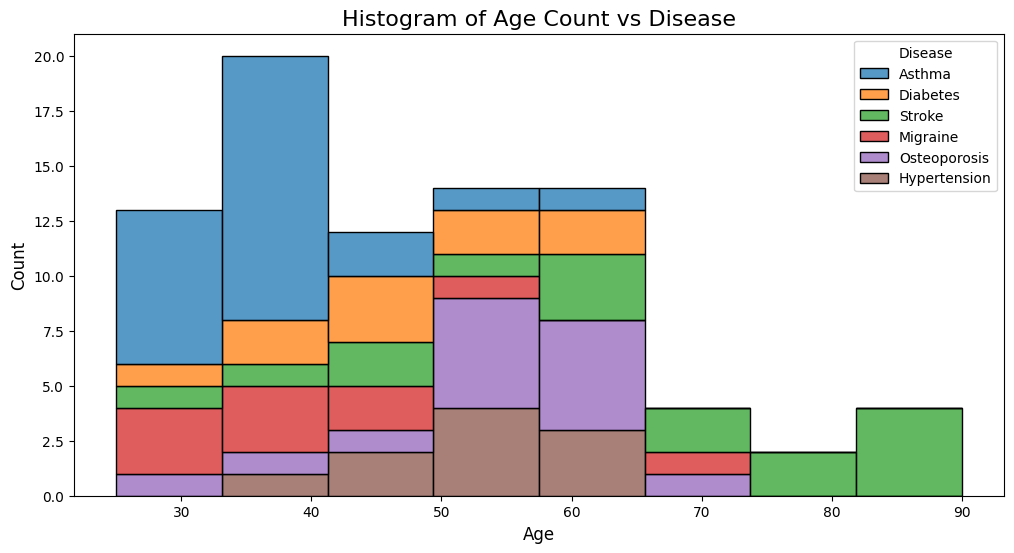

In [16]:
encoded_data['Disease'] = encoded_data['Disease'].map(label_mappings['Disease'])
plt.figure(figsize=(12, 6))
sns.histplot(data=encoded_data, x='Age', hue='Disease', multiple='stack', kde=False)

# Add labels and title
plt.title('Histogram of Age Count vs Disease', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

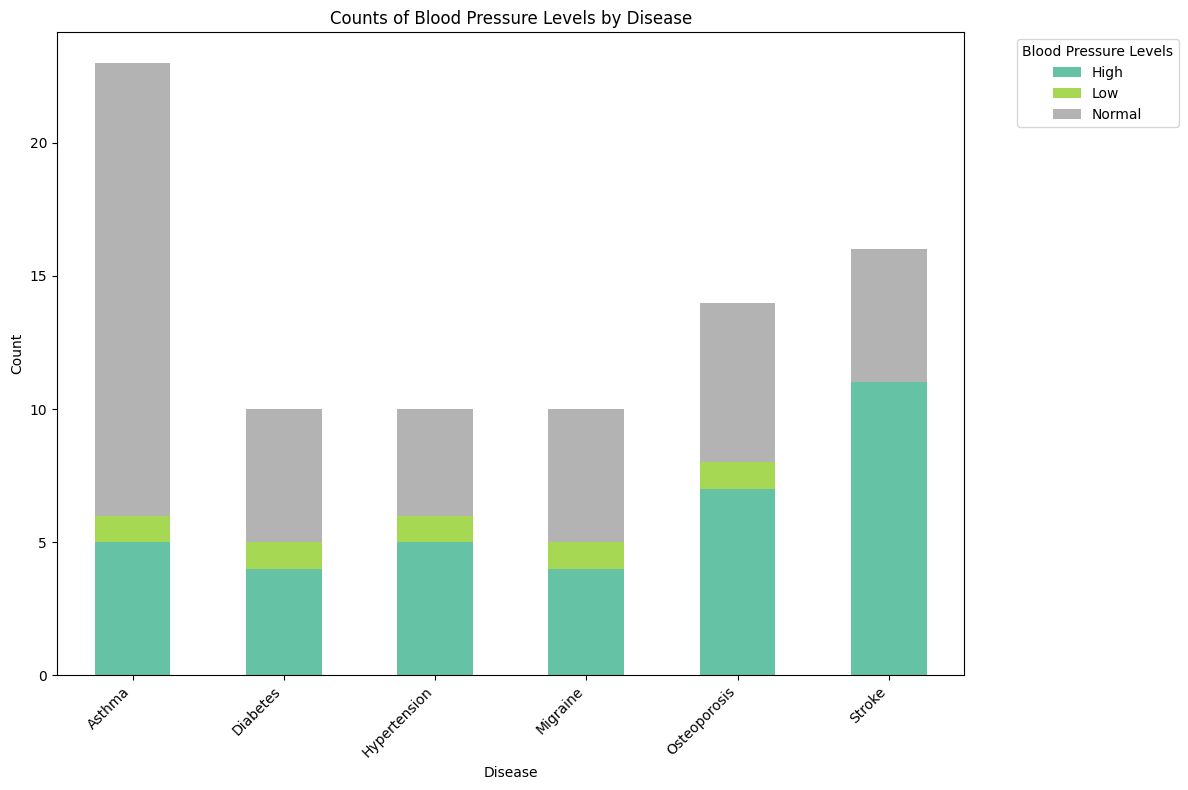

Blood Pressure  High  Low  Normal
Disease                          
Asthma             5    1      17
Diabetes           4    1       5
Hypertension       5    1       4
Migraine           4    1       5
Osteoporosis       7    1       6
Stroke            11    0       5


In [17]:
# Group by 'Disease' and 'BP' to get counts
bp_counts_by_disease = filter_df.groupby(['Disease', 'Blood Pressure']).size().unstack(fill_value=0)

# Plot the data
bp_counts_by_disease.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set2')
plt.title('Counts of Blood Pressure Levels by Disease')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.legend(title='Blood Pressure Levels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Print the table of counts for reference
print(bp_counts_by_disease.fillna(0).astype(int))

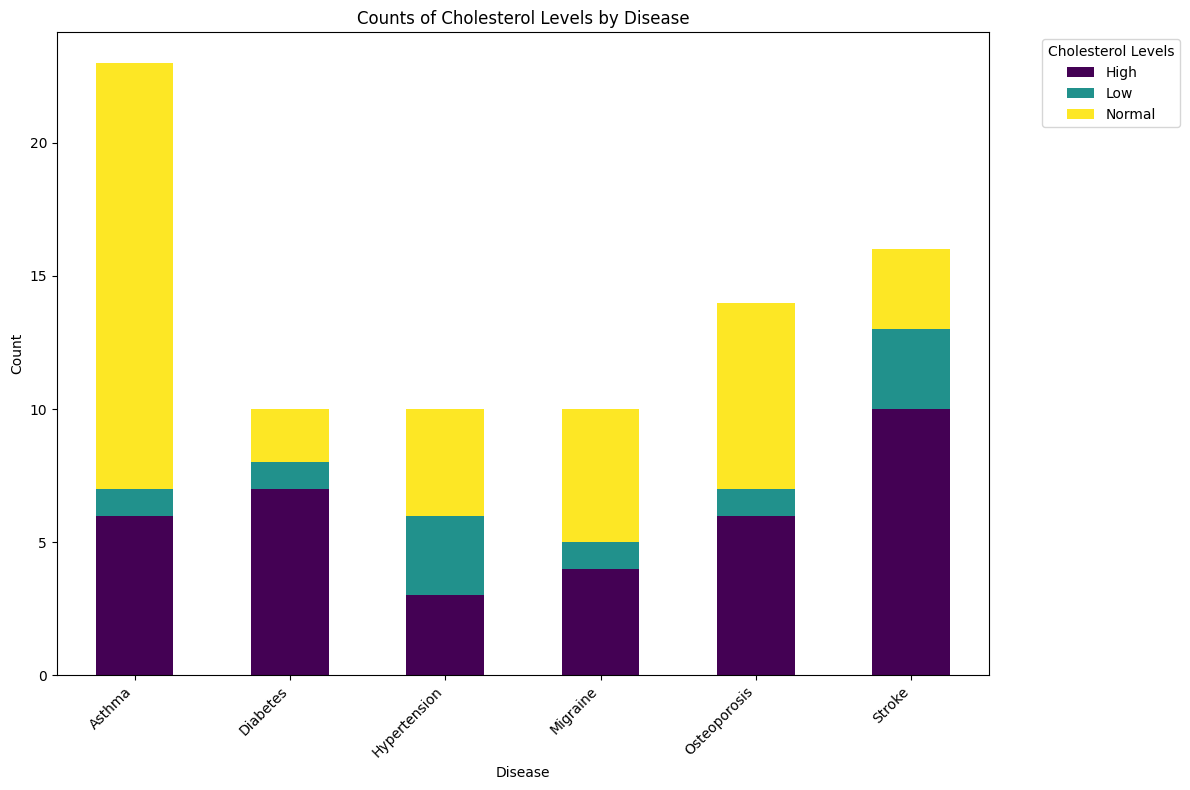

Cholesterol Level  High  Low  Normal
Disease                             
Asthma                6    1      16
Diabetes              7    1       2
Hypertension          3    3       4
Migraine              4    1       5
Osteoporosis          6    1       7
Stroke               10    3       3


In [18]:
# Group by 'Disease' and 'BP' to get counts
bp_counts_by_disease = filter_df.groupby(['Disease', 'Cholesterol Level']).size().unstack(fill_value=0)

# Plot the data
bp_counts_by_disease.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Counts of Cholesterol Levels by Disease')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.legend(title='Cholesterol Levels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Print the table of counts for reference
print(bp_counts_by_disease.fillna(0).astype(int))

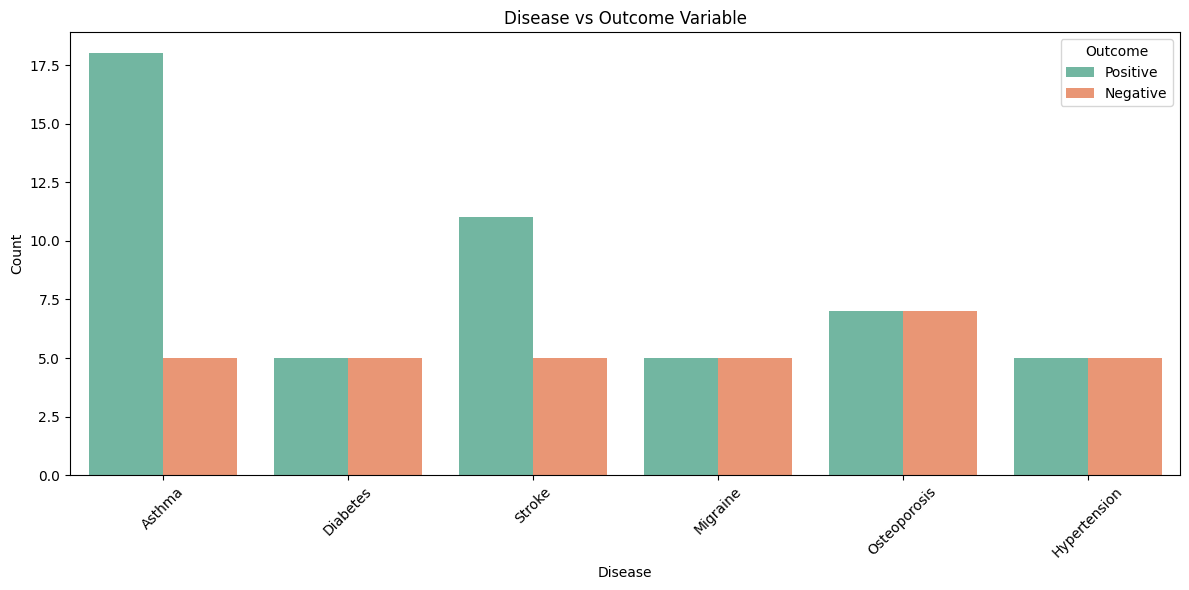

In [19]:
# retireving the label and creating a count plot
encoded_data['Outcome Variable'] = encoded_data['Outcome Variable'].map(label_mappings['Outcome Variable'])
plt.figure(figsize=(12, 6))
sns.countplot(x='Disease', hue='Outcome Variable', data=encoded_data, palette='Set2')

# Customize the plot
plt.title('Disease vs Outcome Variable')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.tight_layout()

# Show the plot
plt.show()